In [ ]:
# numpy (matrix, sum, mean)

In [ ]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

print(arr)
print(type(arr))

[1 2 3 4 5]
<class 'numpy.ndarray'>


In [ ]:
print('select elements by index:',arr[0])
print('slice elements of the array:',arr[1:5])
print('ending point of the array:',arr[4:])
print('ending point of the array:',arr[:4])

select elements by index: 1
slice elements of the array: [2 3 4 5]
ending point of the array: [5]
ending point of the array: [1 2 3 4]


In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2))
print(arr)

[1 2 3 4 5 6]


In [ ]:
arr = np.stack((arr1, arr2), axis=1)
print(arr)

[[1 4]
 [2 5]
 [3 6]]


In [ ]:
arr = np.stack((arr1, arr2), axis=0)
print(arr)

[[1 2 3]
 [4 5 6]]


In [ ]:
np.mean(arr,axis=1)

array([2., 5.])

In [ ]:
np.mean(arr,axis=0)

array([2.5, 3.5, 4.5])

In [ ]:
# pandas ( dataframes, series,describe, info, groupby, pivot, plots)

In [ ]:
# Constructing DataFrame from a dictionary.
import pandas as pd

d = {'col1': [1,5,8, 2], 'col2': [3,3,7, 4]}
df = pd.DataFrame(data=d)
df

col1  col2
0     1     3
1     5     3
2     8     7
3     2     4

In [ ]:
df = pd.DataFrame({'Animal': ['Dog', 'Dog',
                              'Rat', 'Rat','Rat'],
                   'Max Speed': [380., 370., 24., 26.,25.],
                   'Max Weight': [10., 8.1, .1, .12,.09]})
df

Animal  Max Speed  Max Weight
0    Dog      380.0       10.00
1    Dog      370.0        8.10
2    Rat       24.0        0.10
3    Rat       26.0        0.12
4    Rat       25.0        0.09

In [ ]:
df.groupby(['Animal']).mean()

Max Speed  Max Weight
Animal                       
Dog         375.0    9.050000
Rat          25.0    0.103333

In [ ]:
df.value_counts()

Animal  Max Speed  Max Weight
Dog     370.0      8.10          1
        380.0      10.00         1
Rat     24.0       0.10          1
        25.0       0.09          1
        26.0       0.12          1
dtype: int64

In [ ]:
# Aggregate over the rows.

df.agg("mean", axis="rows",numeric_only=True)

Max Speed     165.000
Max Weight      3.682
dtype: float64

In [ ]:
df.agg({'Max Speed' : ['sum', 'min'], 'Max Weight' : ['mean', 'max']})

Max Speed  Max Weight
sum       825.0         NaN
min        24.0         NaN
mean        NaN       3.682
max         NaN      10.000

In [ ]:
df.quantile(.1)

Max Speed     24.400
Max Weight     0.094
Name: 0.1, dtype: float64

In [ ]:
df.quantile([.1, .5])

val
0.1  1.5
0.5  3.5

In [ ]:
df = pd.DataFrame({'type': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'cat': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'val': [1, 2, 3, 4, 5, 6],
                   'letter': ['x', 'y', 'z', 'q', 'w', 't']})
df

type cat  val letter
0  one   A    1      x
1  one   B    2      y
2  one   C    3      z
3  two   A    4      q
4  two   B    5      w
5  two   C    6      t

In [ ]:
df.pivot(index='type', columns='cat', values='val')

cat   A  B  C
type         
one   1  2  3
two   4  5  6

In [ ]:
# seaborn (bar chart, hist,pairplot, density, boxplot, scatter)

In [ ]:
# These examples will use the “tips” dataset, which has a mixture of numeric and categorical variables:
import seaborn as sns

tips = sns.load_dataset("tips")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

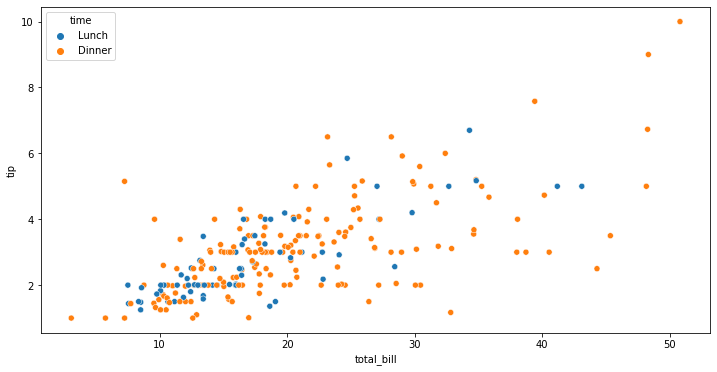

In [ ]:
import matplotlib.pyplot as plt # visualization


f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

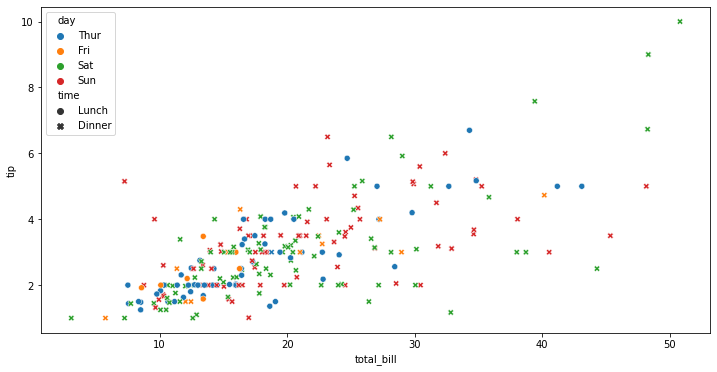

In [ ]:
# Assigning hue and style to different variables will vary colors and markers independently:
f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", style="time")

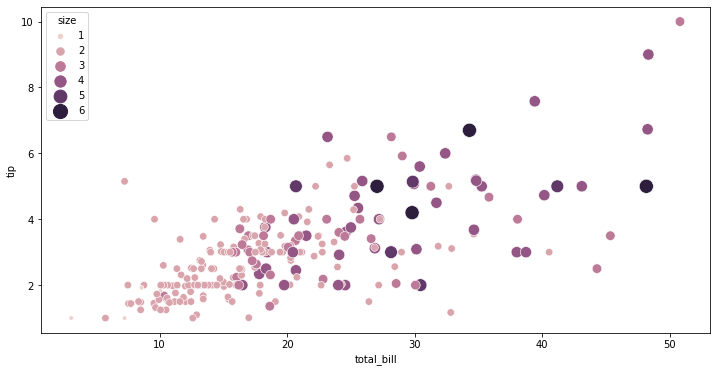

In [ ]:
# A numeric variable can also be assigned to size to apply a semantic mapping to the areas of the points:
# control the range of marker areas with sizes, and set lengend="full" to force every unique value to appear in the legend:
f, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), legend="full"
)

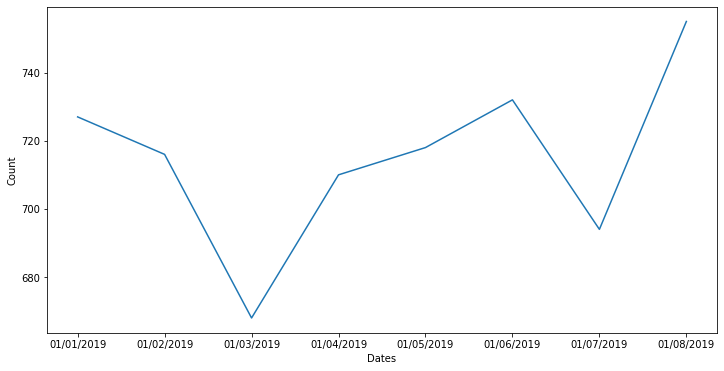

In [ ]:
df = pd.DataFrame({"Dates": ['01/01/2019','01/02/2019','01/03/2019','01/04/2019',
                             '01/05/2019','01/06/2019','01/07/2019','01/08/2019'],
                   "Count": [727,716,668,710,718,732,694,755]})
plt.figure(figsize = (12,6))
sns.lineplot(x = 'Dates', y = 'Count',data = df)

In [ ]:
# Timeseries plot with error bands

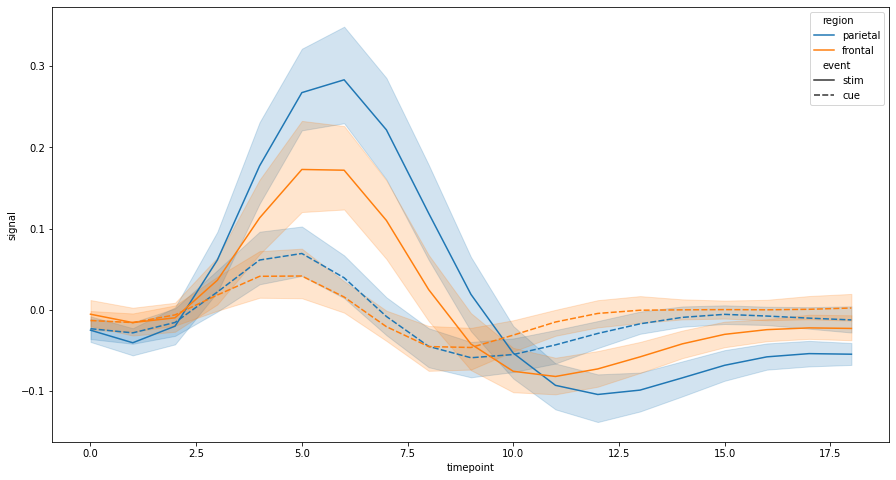

In [ ]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")
f, ax = plt.subplots(figsize=(15, 8))
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [ ]:
# bar chart

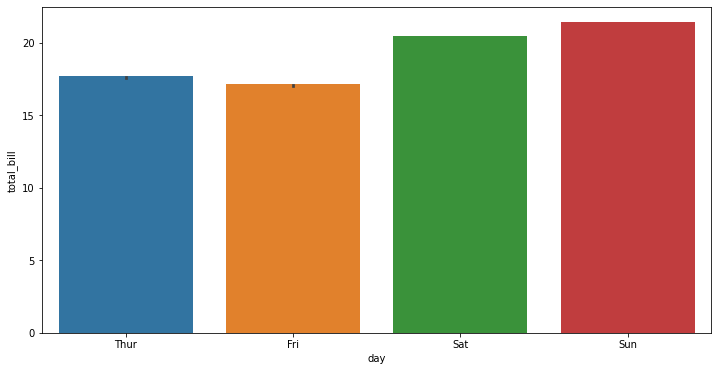

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="total_bill", data=tips,ci=.9)

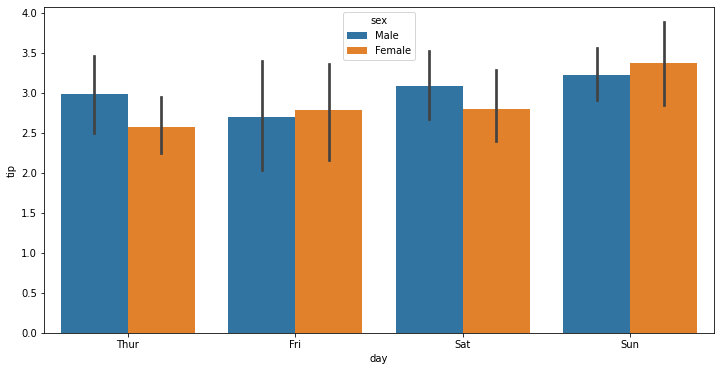

In [ ]:
# Draw a set of vertical bars with nested grouping by a two variables:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="day", y="tip", hue="sex", data=tips)

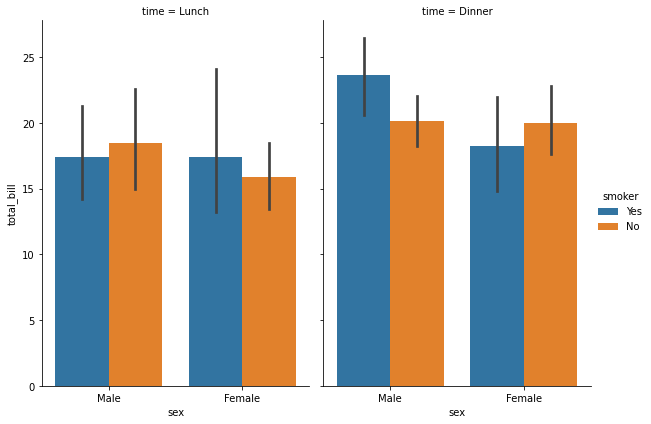

In [ ]:
# Use catplot() to combine a barplot() and a FacetGrid. This allows grouping within additional categorical variables. Using catplot() is safer than using FacetGrid directly, as it ensures synchronization of variable order across facets:

sns.catplot(x="sex", y="total_bill",hue="smoker", col="time",data=tips, kind="bar",height=6, aspect=.7)

In [ ]:
# histogram

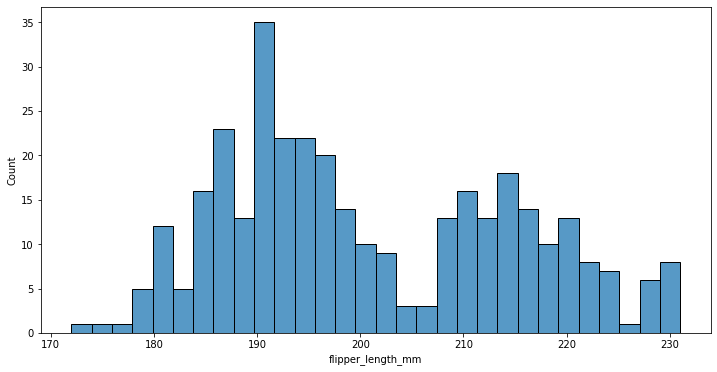

In [ ]:
penguins = sns.load_dataset("penguins")
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

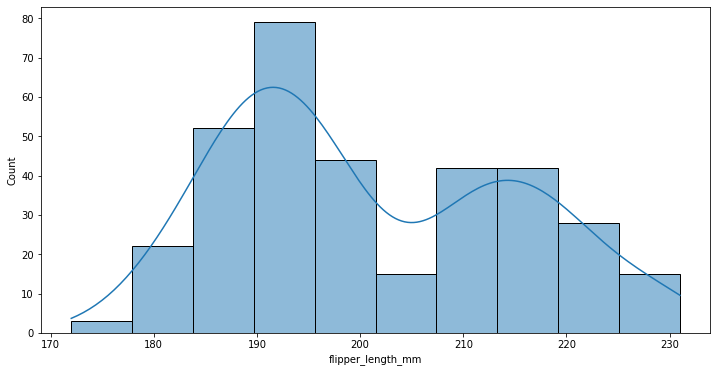

In [ ]:
# Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

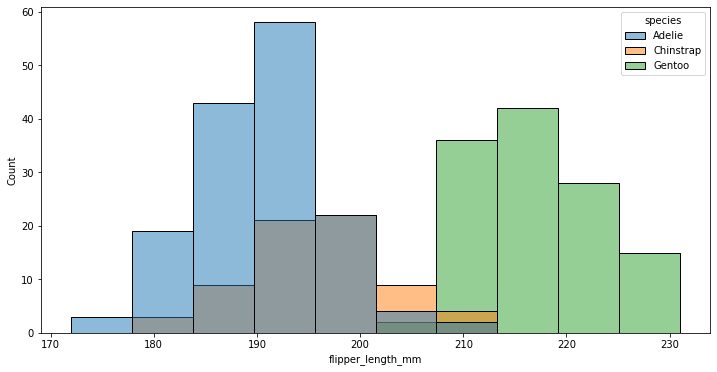

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

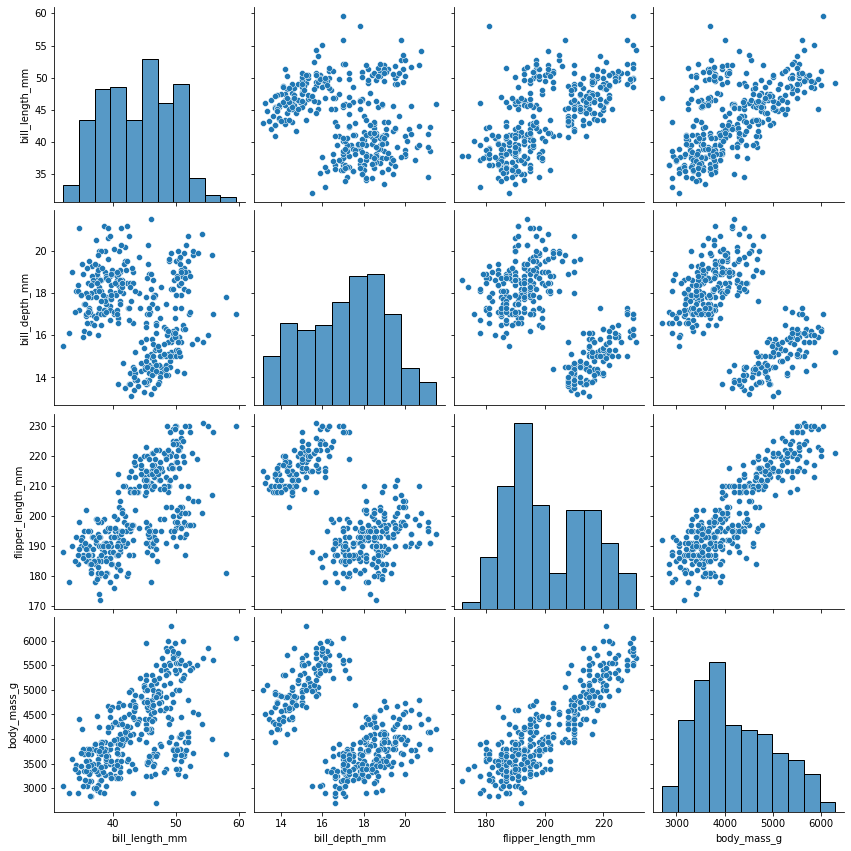

In [ ]:
sns.pairplot(penguins,height=3)

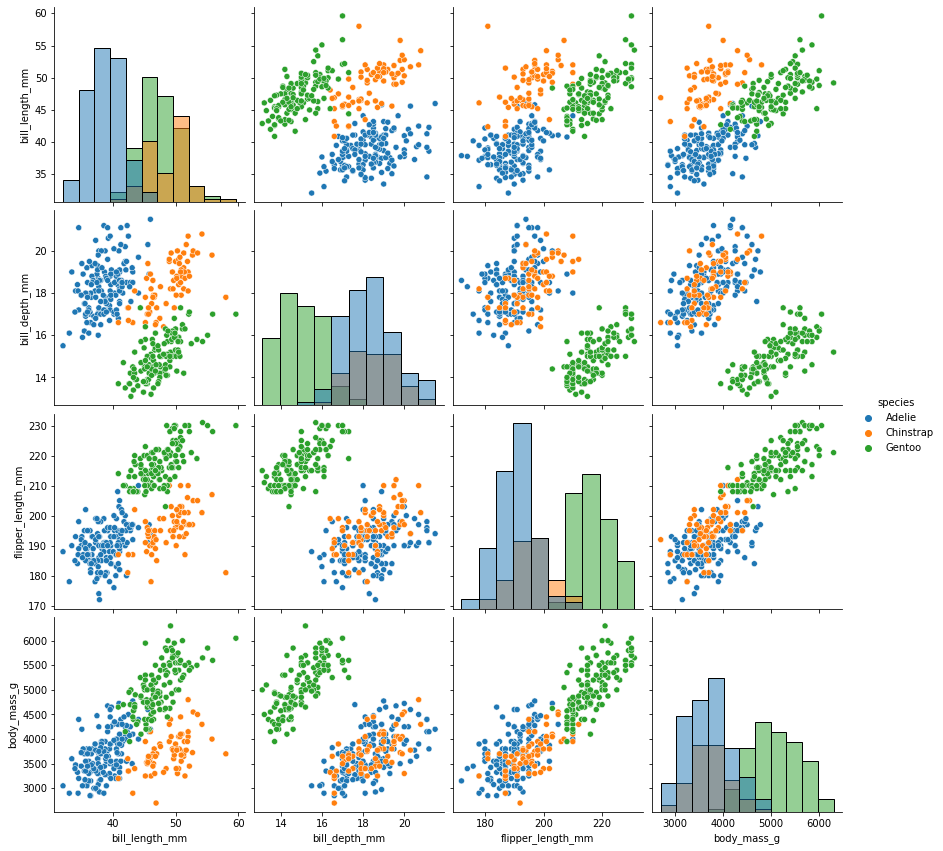

In [ ]:
sns.pairplot(penguins, hue="species", diag_kind="hist",height=3)

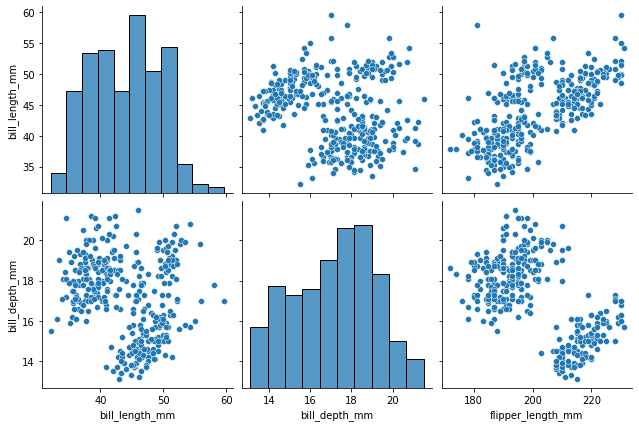

In [ ]:
sns.pairplot(
    penguins,
    x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
    y_vars=["bill_length_mm", "bill_depth_mm"],
    height=3
)

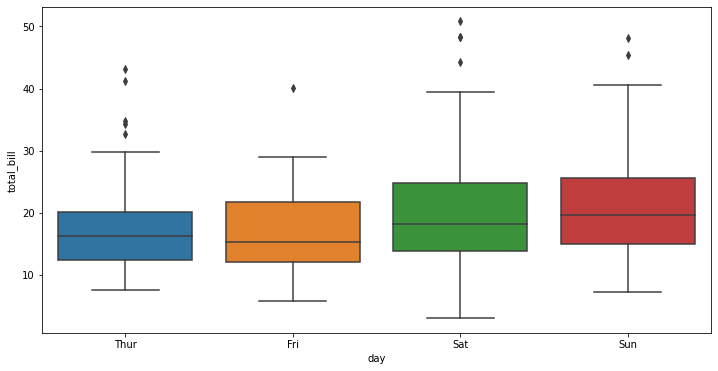

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="day", y="total_bill", data=tips)

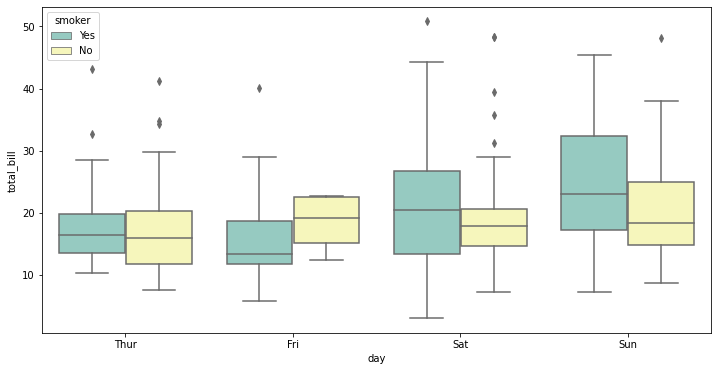

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

In [ ]:
# validating effects of changes 

In [ ]:
# T-tests (https://python.cogsci.nl/numerical/statistics/)
# Independent-samples t-test
# Consider this dataset from Matzke et al. (2015). In this dataset, participants performed a memory task in which they recalled a list of words. During the retention interval, one group of participants looked at a central fixation dot on a display. Another group of participants continuously made horizontal eye movements, which is believed by some to improve memory.

# You can use the ttest_ind() function from scipy.stats to test whether memory performance (CriticalRecall) was higher for the horizontal-eye-movement group as compared to the fixation group.

In [ ]:
from scipy.stats import ttest_ind

dm = pd.read_csv('matzke_et_al.csv')

dm_horizontal = dm[dm.Condition=='Horizontal']
dm_fixation = dm[dm.Condition=='Fixation']

t, p = ttest_ind(dm_horizontal.CriticalRecall, dm_fixation.CriticalRecall)
print('t = {:.3f}, p = {:.3f}'.format(t, p))

t = -2.845, p = 0.007


In [ ]:
# This reveals a significant difference (p = .0066). However, as you can see in the figure below, the effect goes in the opposite direction from the prediction, such that the fixation group performed best.

# You can also use the ttest() function from pingouin. This also provides a Bayes Factor, for those who are into Bayesian statistics.

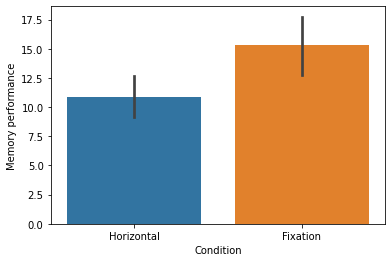

In [ ]:
sns.barplot(x='Condition', y='CriticalRecall', data=dm)
plt.xlabel('Condition')
plt.ylabel('Memory performance')
plt.show()

In [ ]:
# Paired-samples t-test
# Consider this dataset from Moore, McCabe, & Craig. Here, aggressive behavior from people suffering from dementia was measured during full moon and another phase of the lunar cycle. Each participant was measured at both phases, i.e. this was a within-subject design.

# You can use the ttest_rel() function to test whether aggression differed between the full moon and the other lunar phase.

from scipy.stats import ttest_rel

dm = pd.read_csv('moon-aggression.csv')

t, p = ttest_rel(dm.Moon, dm.Other)
print('t = {:.3f}, p = {:.3f}'.format(t, p))
# Output:

# t = 6.4518, p = 0.0000
# Interestingly, there was indeed a significant effect (p < .0001; note that p values are never 0 as the output implies!), and this effect was in such that people were indeed most aggressive during full moon, as you can see in the figure below.

# You can also use the ttest() function from pingouin and use the paired keyword to indicate that this is a paired-samples t-test, as opposed to an independent-samples t-test.

t = 6.452, p = 0.000


In [ ]:
# Multiple linear regression
# Consider this dataset from Moore, McCabe, & Craig which contains grade-point averages (gpa) and SAT scores for mathematics (satm) and verbal knowledge (satv) for 500 high-school students. To test whether satm and satv are (uniquely) related to gpa, you can use the code below.

# The series of function calls (model = ols(…).fit() and then model.summary()) isn't very elegant, but the important part is the formula that is specified in a string with an R-style formula.
from statsmodels.formula.api import ols

dm = pd.read_csv('gpa.csv')
model = ols('gpa ~ satm + satv', data=dm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.476
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           0.000722
Time:                        14:06:57   Log-Likelihood:                -254.18
No. Observations:                 224   AIC:                             514.4
Df Residuals:                     221   BIC:                             524.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2887      0.376      3.427      0.0

In [ ]:
# This reveals that only SAT scores for mathematics (t = 3.444, p = .001), but not for verbal knowledge (t = -0.040, p = .968), are uniquely related to grade point average.

# You can also use the linear_regression() function from pingouin. The first argument, X, now consists of multiple columns (as opposed to a single column when doing a simple linear regression). To select the columns that should be used as predictors, you can simply select them directly from the datamatrix (dm['satm', 'satv']).

In [ ]:
# ANOVA
# ANOVA (regular)
# Let's go back to this heart-rate data from Moore, McCabe, and Craig. This dataset contains two factors that vary between subjects (Gender and Group) and one dependent variable (Heart Rate). To test whether Gender, Group, or their interaction affect heart rate, you need the following code.

# As above, the combination of ols() and anova_lm() isn't very elegant, but the important part is the formula.

from statsmodels.stats.anova import anova_lm

dm = pd.read_csv('heartrate.csv')
dm = dm.rename({'Heart Rate':'HeartRate'},axis=1)  # statsmodels doesn't like spaces
df = anova_lm(ols('HeartRate ~ Gender * Group', data=dm).fit())
print(df)

                 df      sum_sq        mean_sq           F         PR(>F)
Gender          1.0   45030.005   45030.005000  185.979949   3.287945e-38
Group           1.0  168432.080  168432.080000  695.647040  1.149926e-110
Gender:Group    1.0    1794.005    1794.005000    7.409481   6.629953e-03
Residual      796.0  192729.830     242.122902         NaN            NaN


In [ ]:
# This reveals that heart rate is related to all factors: gender (F = 185.980, p < .001), group (F = 695.647, p < .001), and the gender-by-group interaction (F = 7.409, p = .006).